## **ΥΠΟΛΟΓΙΣΤΙΚΗ ΕΡΓΑΣΙΑ IV: Χρονική εξέλιξη μιας κατάστασης σπιν $|s\rangle$ εντός σταθερού μαγνητικού πεδίου**

Θεωρήστε ένα κβαντικό σωματίδιο με αρχική κατάσταση σπιν $|s \rangle =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}$ τη χρονική στιγμή $t=0$. Στο σωματίδιο εφαρμόζεται εξωτερικό σταθερό μαγνητικό πεδίο, παράλληλο προς τον άξονα z: $\vec{B}//\vec{e_z}$. Χρησιμοποιώντας τις δυνατότητες γραμμικής άλγεβρας της `SymPy`, ολοκληρώστε τις ακόλουθες ερωτήσεις.

**Παρατηρήσεις/Υποδείξεις:**

1. Ο γενικός τύπος του τελεστή χρονικής εξέλιξης για μια κατάσταση σπιν, όταν ένα εξωτερικό μαγνητικό πεδίο $\vec{B}$ εφαρμόζεται είναι: $$\hat{U}(t) = e^{-iωt(\vec{σ}\cdot \vec{B})}=cos(ωt)I_{2x2}-i (\vec{σ}\cdot \vec{n})sin(ωt)$$ όπου $I_{2x2}$ είναι ο $2x2$ ταυτοτικός πίνακας, $\vec{n}=\frac{\vec{B}}{|\vec{B}|}$ και $\vec{σ}=σ_1 \vec{e_x} + σ_2 \vec{e_y} + σ_3 \vec{e_z}$ (με $σ_i$, $i=1,2,3$ τους πίνακες *Pauli*).

2. Η μέση τιμή $\langle \hat{A} \rangle_ψ$ ενός ερμιτιανού τελεστή $\hat{A}$, ως προς μια κβαντική κατάσταση $|ψ\rangle$ είναι ίση με: $$\langle\hat{A} \rangle_ψ = \langle ψ|\hat{A}|ψ\rangle$$

3. Το διάνυσμα-τελεστής σπιν συνδέεται με το διάνυσμα-τελεστή των πινάκων Pauli μέσω της σχέσης:
$$\vec{s}=\frac{\hbar}{2}\vec{σ}$$

**Προετοιμασία**

In [2]:
# Φορτώνουμε τη βιβλιοθήκη SymPy
import sympy as smp

In [11]:
# Ορισμός χρήσιμων συμβόλων
t,omega,hbar = smp.symbols("t ω hbar",positive=True)
i = smp.I

# Ορίστε τους πίνακς Pauli και εκτυπώστε τους
sigma_1 = smp.Matrix([[0,1],[1,0]]) # στη θέση του 1 να αντικαταστήσετε την σωστή μορφή του πίνακα σ_1 = σ_x
sigma_2 = smp.Matrix([[0,-i],[i,0]]) # στη θέση του 2 να αντικαταστήσετε την σωστή μορφή του πίνακα σ_2 = σ_y
sigma_3 = smp.Matrix([[1,0],[0,-1]]) # στη θέση του 3 να αντικαταστήσετε την σωστή μορφή του πίνακα σ_3 = σ_z

display(sigma_1)
display(sigma_2)
display(sigma_3)

# Ορίστε τον ταυτοτικό πίνακα 2x2 και εκτυπώστε τον
iden_2x2 = smp.Matrix([[1,0],[0,1]]) # αντί για το 4 γράψτε την σωστή μορφή

display(iden_2x2)

# Ορίστε την αρχική κατάσταση-spin σε μορφή πίνακα και εκτυπώστε την
spin_init = smp.Matrix([[1/smp.sqrt(2)],[1/smp.sqrt(2)]]) # αντί για το 5 γράψτε την σωστή μορφή


display(spin_init)

Matrix([
[0, 1],
[1, 0]])

Matrix([
[0, -I],
[I,  0]])

Matrix([
[1,  0],
[0, -1]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

**Ερώτηση 1** 

Δείξτε ότι ο τελεστής της χρονικής εξέλιξης $\hat{U}(t)$ (της spin-κατάστασης του σωματιδίου) έχει την ακόλουθη μορφή μήτρας: 
$$\begin{bmatrix} e^{-iωt} & 0 \\ 0 & e^{iωt}\end{bmatrix} ή \begin{bmatrix} cos(ωt)-isin(ωt) & 0 \\ 0 & cos(ωt)+isin(ωt)\end{bmatrix}$$
Εξηγήστε στο παρακάτω **Markdown** κελί το σκεπτικό σας για να καταλήξετε στο συγκεκριμένο αποτέλεσμα.

**Εξήγηση**


Απλα θα εφαρμοσουμε τον τυπο πουμ ας δινεται στο πανω markdown, και το μονο που εχουμε να "εφαρμοσουμε" περα απο τον τυπο αυτουσιο ειναι το γεγονος οτι n*σ θα μας δωσει αποκλειστικα τον πινακα Pauli 3 για τον z-αξονα.
Το γραφουμε με την σωστη μορφη και παιρνουμε το αποτελεσμα.
Με το simplify παιρνουμε την πιο απλη μορφη του ενω χωρις παιρνουμε την πιο περιπλοκη.

In [4]:
# Ορισμός και εκτύπωση του τελεστή χρονικής εξέλιξης
def U(t,ω):
    return smp.simplify(smp.cos(ω*t) * iden_2x2 - i * (sigma_3) *smp.sin(ω*t))

# εντός της εντολής simplify γράψτε τον σωστό τύπο του τελεστή χρονικής εξέλιξης
# δοκιμάστε επίσης να επιστρέψετε την μορφή του τελεστή και χωρίς την εντολή simplify

display(U(t,omega))

def U_s(t,ω):
    a = smp.cos(ω*t)*iden_2x2
    b = i*sigma_3 * smp.sin(ω*t)
    return a - b


display(U_s(t,omega))

Matrix([
[exp(-I*t*ω),          0],
[          0, exp(I*t*ω)]])

Matrix([
[-I*sin(t*ω) + cos(t*ω),                     0],
[                     0, I*sin(t*ω) + cos(t*ω)]])

**Ερώτηση 2** 

**α)** Ορίστε μια συνάρτηση που επιστρέφει τη χρονική εξέλιξη της κατάστασης σπιν του σωματιδίου $|s(t)\rangle$ σε μορφή μήτρας και εμφανίστε τη συμβολική μορφή της $|s(t)\rangle$.

**Βοήθεια**

Για να λάβουμε την χρονική εξέλιξη $|s(t)\rangle$ της spin-κατάστασης ενός σωματιδίου, αρκεί να εφαρμόσουμε τον τελεστή $\hat{U}(t)$, πολλαπλασιάζοντας την αρχική spin-κατάσταση $|s\rangle$ από τα αριστερά. Δηλαδή:

$$|s(t)\rangle=\hat{U}(t)|s\rangle$$

In [5]:
# Ορισμός και εκτύπωση της χρονικής εξέλιξης της spin-κατάστασης
# του σωματιδίου

def spin_t(t,ω):
    return smp.simplify(U(t,ω)*spin_init)

# εντός της εντολής simplify γράψτε τον σωστό τύπο
# της χρονικής εξέλιξης της spin-κατάστασης

display(spin_t(t,omega))

Matrix([
[sqrt(2)*exp(-I*t*ω)/2],
[ sqrt(2)*exp(I*t*ω)/2]])

**β)** Βρείτε την μορφή της $|s(t)\rangle$ τη χρονική στιγμή $t=2s$, όταν $ω=\frac{π}{3}Hz$.

In [6]:
display(spin_t(2,smp.pi/3))

Matrix([
[-sqrt(2)/4 - sqrt(6)*I/4],
[-sqrt(2)/4 + sqrt(6)*I/4]])

**Ερώτηση 3** 

**α)** Βρείτε τη συμβολική μορφή των ακόλουθων μέσων τιμών: $\langle \hat{s}_x \rangle_t$, $\langle \hat{s}_y \rangle_t$ και $\langle \hat{s}_z \rangle_t$, ως προς την κατάσταση σπιν $|s(t)\rangle$. 

In [7]:
# Ορισμός και εκτύπωση των spin-πινάκων s_x,s_y και s_z
hbar=1 #δηλωνω εδω to hbar = 1 για το τελυταιο ερωτημα 
s_x = (1/2)*hbar*sigma_1
s_y = (1/2)*hbar*sigma_2
s_z = (1/2)*hbar*sigma_3

# γράψτε παραπάνω τον σωστό τύπο των πινάκων s_x,s_y και s_z

display(s_x)
display(s_y)
display(s_z)

Matrix([
[  0, 0.5],
[0.5,   0]])

Matrix([
[    0, -0.5*I],
[0.5*I,      0]])

Matrix([
[0.5,    0],
[  0, -0.5]])

In [8]:
# Εύρεση και εκτύπωση των ζητούμενων μέσων τιμών
mean_s_x = smp.simplify(smp.conjugate(spin_t(t,omega).T)*s_x*spin_t(t,omega)) # <s_x>(t)
mean_s_y = smp.simplify(smp.conjugate(spin_t(t,omega).T)*s_y*spin_t(t,omega)) # <s_y>(t)
mean_s_z = smp.simplify(smp.conjugate(spin_t(t,omega).T)*s_z*spin_t(t,omega)) # <s_z>(t)

# εντός των εντολών simplify γράψτε τους σωστούς τύπους
# για τις ζητούμενες μέσες τιμές

display(mean_s_x)
display(mean_s_y)
display(mean_s_z) #perimenoume 0 

Matrix([[0.5*cos(2*t*ω)]])

Matrix([[0.5*sin(2*t*ω)]])

Matrix([[0]])

**β)** Ορίστε τις μέσες τιμές $\langle \hat{s}_x \rangle_t$ και $\langle \hat{s}_y \rangle_t$ ως αριθμητικές συναρτήσεις των $t$ και $ω$, χρησιμοποιώντας την εντολή `lambdify()`. Θεωρείστε ότι $\hbar=1$, $ω=\frac{π}{4}Hz$ και δημιουργήστε ένα `NumPy` linspace 100 σημείων του $t$, στο διάστημα $[0,4]s$. Φτιάξτε μια γραφική παράσταση χρησιμοποιώντας τις τιμές της αριθμητικής συνάρτησης $\langle \hat{s}_x \rangle_t$ στα σημεία του linspace ως συντεταγμένες στον οριζόντιο άξονα και τις τιμές της αριθμητικής συνάρτησης $\langle \hat{s}_y \rangle_t$ στα σημεία του linspace ως συντεταγμένες στον κατακόρυφο άξονα. Σχολιάστε το αποτέλεσμα.

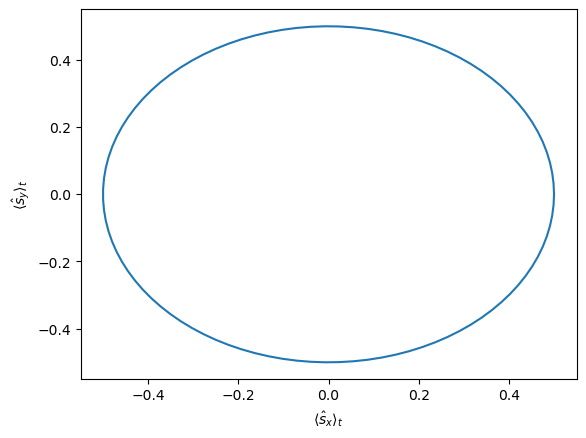

In [10]:
# αντί για 14 ή/και 15 να αντικαταστήσετε την σωστή παράσταση που θα
# μεταγλωττιστεί σε αριθμητική συνάρτηση
hbar = 1
mean_s_x_num = smp.lambdify([t,omega],smp.simplify(smp.conjugate(spin_t(t,omega).T)*s_x*spin_t(t,omega))[0],"numpy")
mean_s_y_num = smp.lambdify([t,omega],smp.simplify(smp.conjugate(spin_t(t,omega).T)*s_y*spin_t(t,omega))[0],"numpy")

from numpy import * # να εισάγετε μόνο την εντολή linspace και το pi από την NumPy
t_space = linspace(0,4,100) # φτιάξτε το ζητούμενο linspace

# εισαγωγή της βιβλιοθήκης matplotlib για γραφικές παραστάσεις
import matplotlib.pyplot as plt 

omega_val = (pi)/4 # αντικαταστήστε το 16 με τη δοσμένη τιμή για το ω

plt.plot(mean_s_x_num(t_space,omega_val), mean_s_y_num(t_space,omega_val))
# plt.axis("equal") # δοκιμάστε να μετατρέψετε σε σχόλιο τη συγκεκριμένη εντολή και ξανατρέξτε το κελί, τι παρατηρείτε;
plt.xlabel(r"$\langle \hat{s}_x \rangle_t$")
plt.ylabel(r"$\langle \hat{s}_y \rangle_t$")
plt.show()

**Σχολιασμός αποτελέσματος**

Αναμενο αποτελεσμα καθως το σπιν περιστρεφεται γυρω απο τον αξονα z διοτι το εξωτερικο μαγνητικο πεδιο ειναι παραλληλο στον αξονα z. Kαθως τωρα βλεπουμε την προβολη του σπιν στο επιπεδο x-y να διαγραφει τελεια κυκλικη τροχια με σταθερη ακτινα με τις μεσες τιμες να ακολουθουν ημιτονοειδεις τροχεις και τελεια συχγρονισμενες επισης η μεγιστη ακτινα ειναι 1/2 το οποιο επεισης ειναι συμφωβνβ με τα δεδομενα καθως s = hbar/2 και στη δικη μας περιπτωση εχουμε hbar = 1
Επισης οταν αφαιρουμε την εντολη pl.axis("equal") πρακτικα αυτο που συμβαινει ειναι οτι πλεον οι αξονες χ και y δεν  εοχυν ιδιες κλιμακες οποτε αυτοματα το matpltlib θα επιλεξει κλιμακες οι οποιες μετατρεπουν και το αποτελεσμα απο τελειο κυκλο σε ενα οβαλ σχημα.